In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from visualization_methods import VisualizationMethods as vm

df = pd.read_csv('django-packages.csv', sep=';')

categories = ['apps', 'frameworks']

removed_packages = [
    'django/django', # Django framework
]

df = df[~df['repo_id'].isin(removed_packages)]
df = df[(df['has_valid_repo_url']) & (df['has_valid_repo'])]
df = df[df['dp_category'].isin(categories)]
df = df[df['repo_last_modified'] >= '2018-01-01T00:00:00:000']

starts_median = np.median(np.array(df['repo_stars'].values))
df = df[df['repo_stars'] >= starts_median]

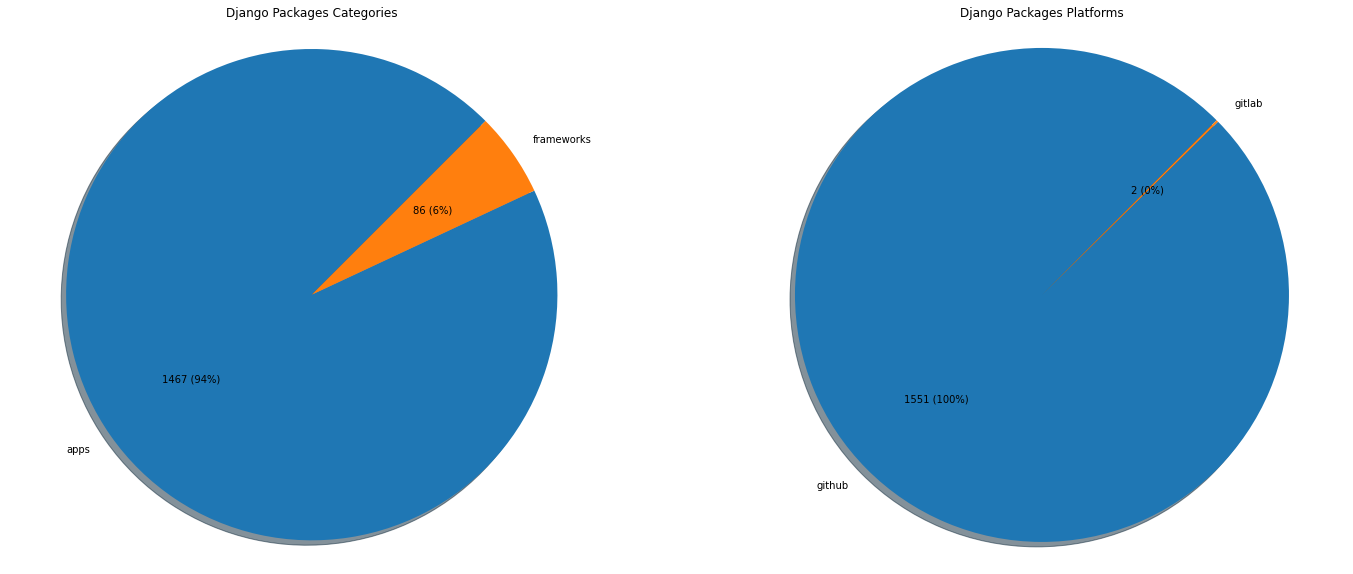

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.set_facecolor('white')

categories = 'apps', 'frameworks'
platforms = 'github', 'gitlab'

sizes = [
    len(df[df['dp_category'] == categories[0]]),
    len(df[df['dp_category'] == categories[1]]),    
]

vm.set_pie_by_ax(ax1, sizes, categories, 'Django Packages Categories')

sizes = [
    len(df[df['platform'] == platforms[0]]),
    len(df[df['platform'] == platforms[1]]),    
]

vm.set_pie_by_ax(ax2, sizes, platforms, 'Django Packages Platforms')

plt.show()

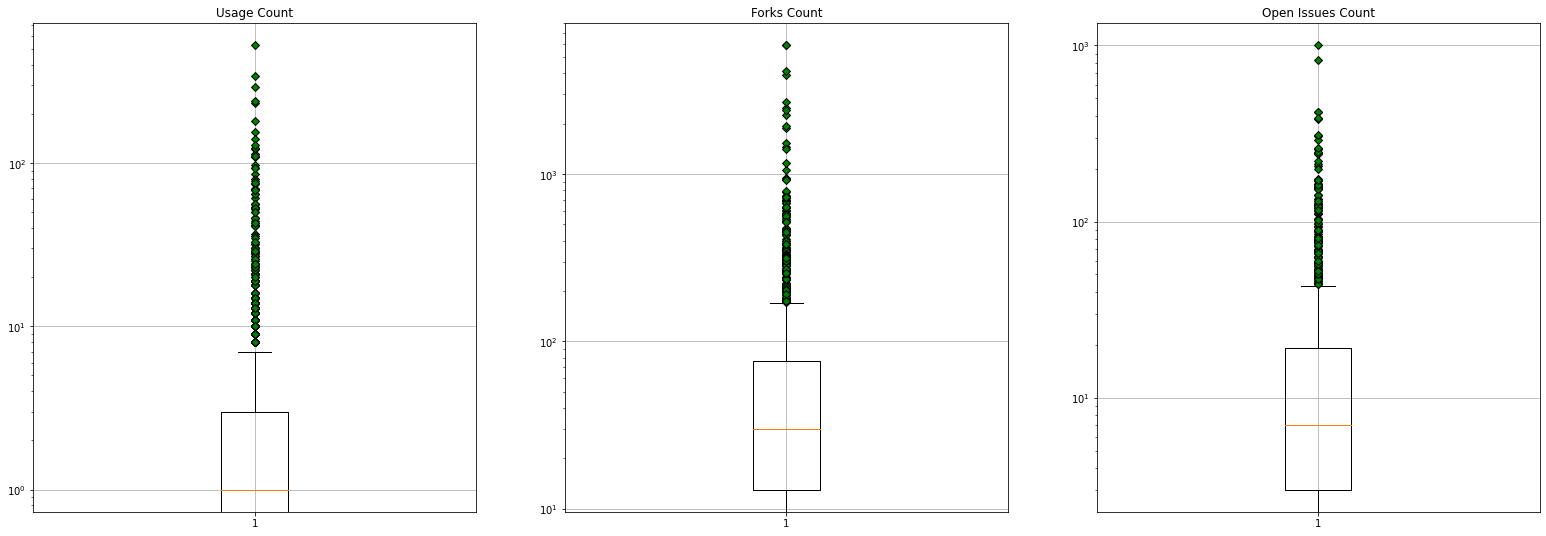

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))

vm.set_boxplot_by_ax(ax1, df['dp_usage_count'].values, 'Usage Count', True)
vm.set_boxplot_by_ax(ax2, df['repo_forks'].values, 'Forks Count', True)
vm.set_boxplot_by_ax(ax3, df['repo_open_issues'].values, 'Open Issues Count', True)

plt.show()

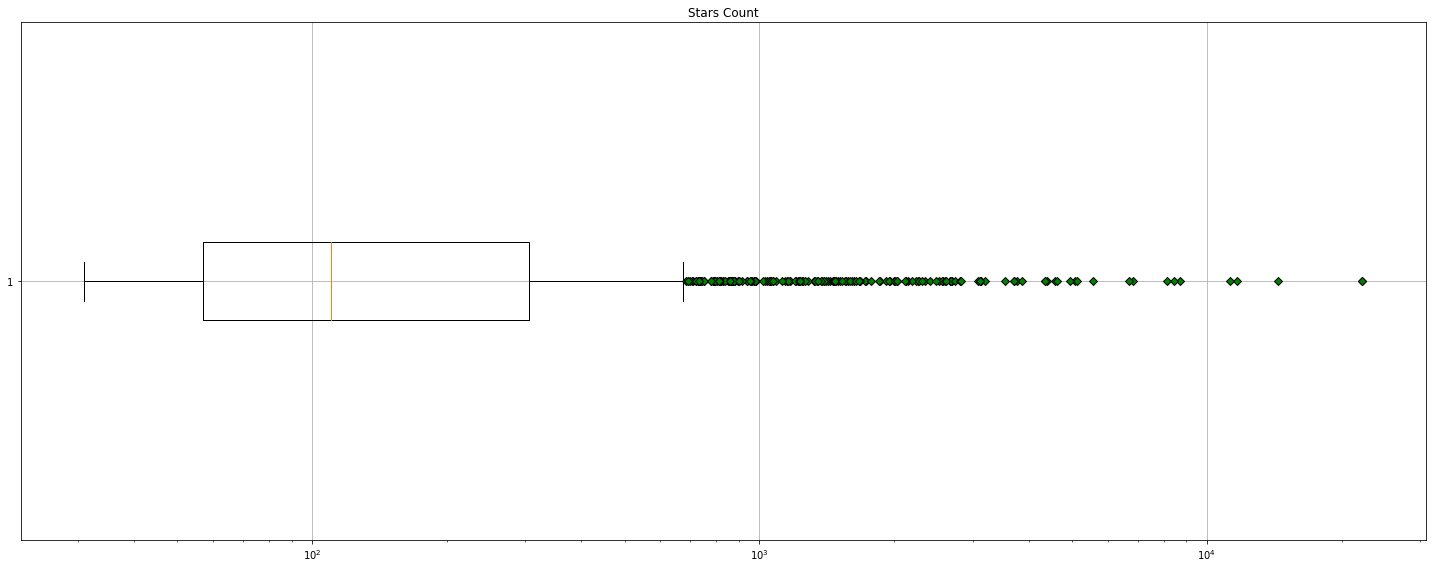

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

vm.set_boxplot_by_ax(ax, df['repo_stars'].values, 'Stars Count', True, True)

plt.tight_layout()
plt.show()